<a href="https://colab.research.google.com/github/milaml/VNP/blob/master/Lab2NaCas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/fake_bills.csv',sep=";")

In [ ]:
df.columns

Index(['is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length'], dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
df.isnull()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [ ]:
missing_values = df.isnull().sum()

In [ ]:
perc = missing_values / len(df) * 100
perc

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      2.466667
margin_up       0.000000
length          0.000000
dtype: float64

In [ ]:
import missingno as msno

<Axes: >

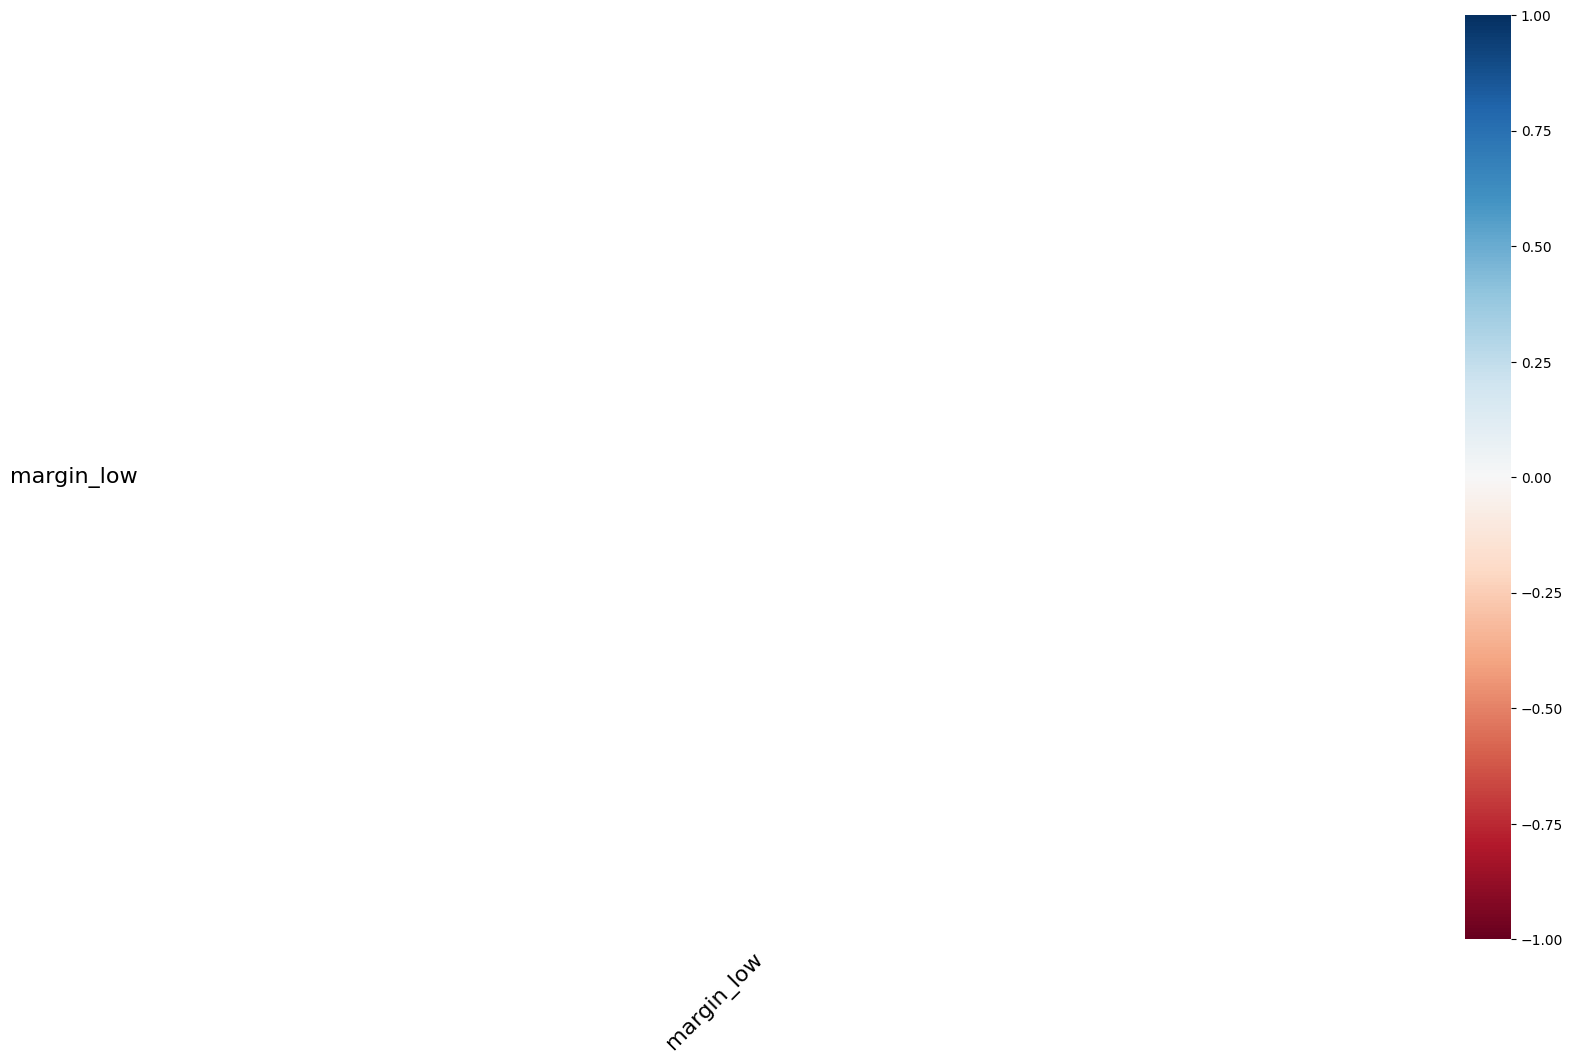

In [ ]:
msno.heatmap(df)

<Axes: >

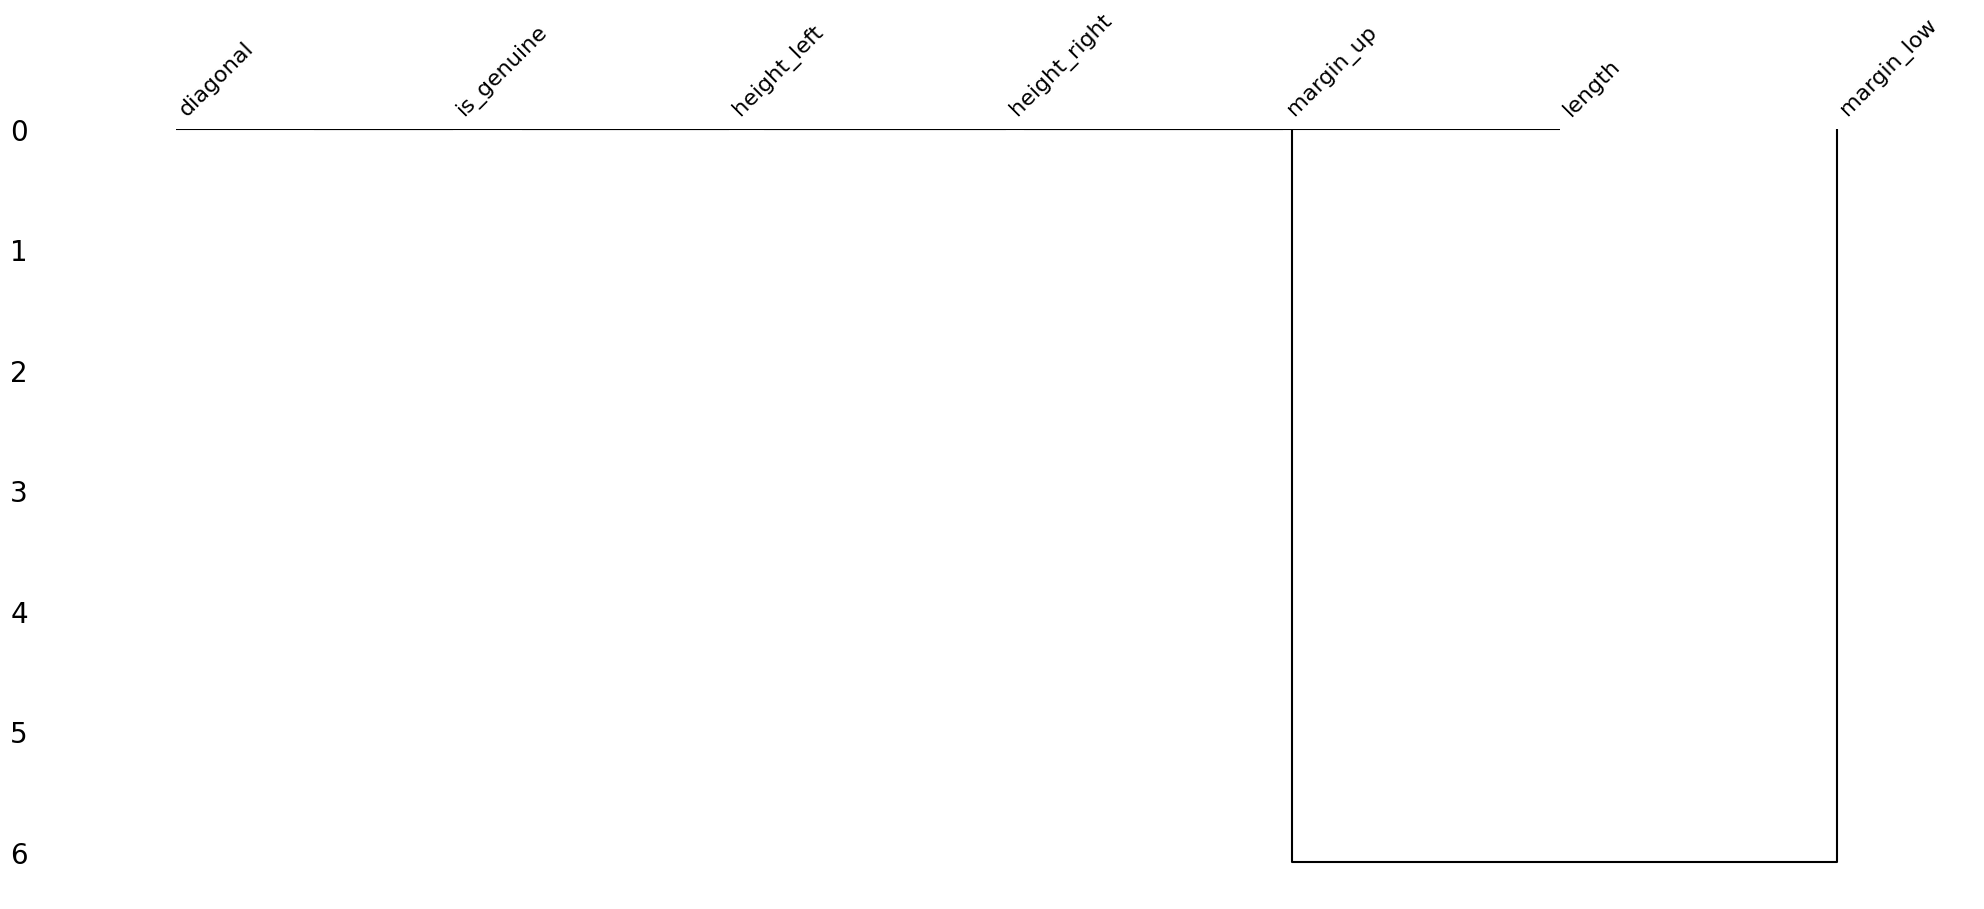

In [ ]:
msno.dendrogram(df)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
df.iloc[:,:] = imp.fit_transform(df)


In [ ]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [ ]:
df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['is_genuine'])
y = df['is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) # You can choose a different value for n_neighbors if needed
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)


In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
scores = []
for k in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    sc = f1_score(preds, y_test)
    scores.append(sc)

In [ ]:
for k, score in enumerate(scores, 1):
    print(f'k={k}: F1 Score={score:.4f}')

k=1: F1 Score=0.9895
k=2: F1 Score=0.9921
k=3: F1 Score=0.9922
k=4: F1 Score=0.9922


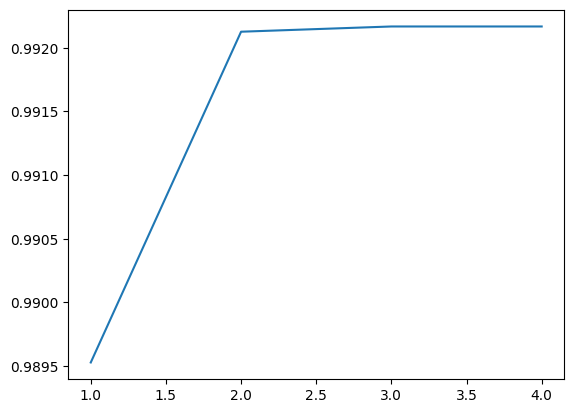

In [ ]:
plt.plot(np.arange(1, 5), scores)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9866666666666667
Confusion Matrix:
[[106   4]
 [  0 190]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       110
         1.0       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

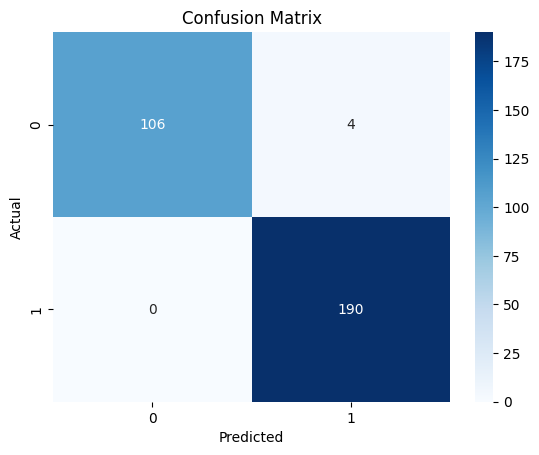

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()